# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

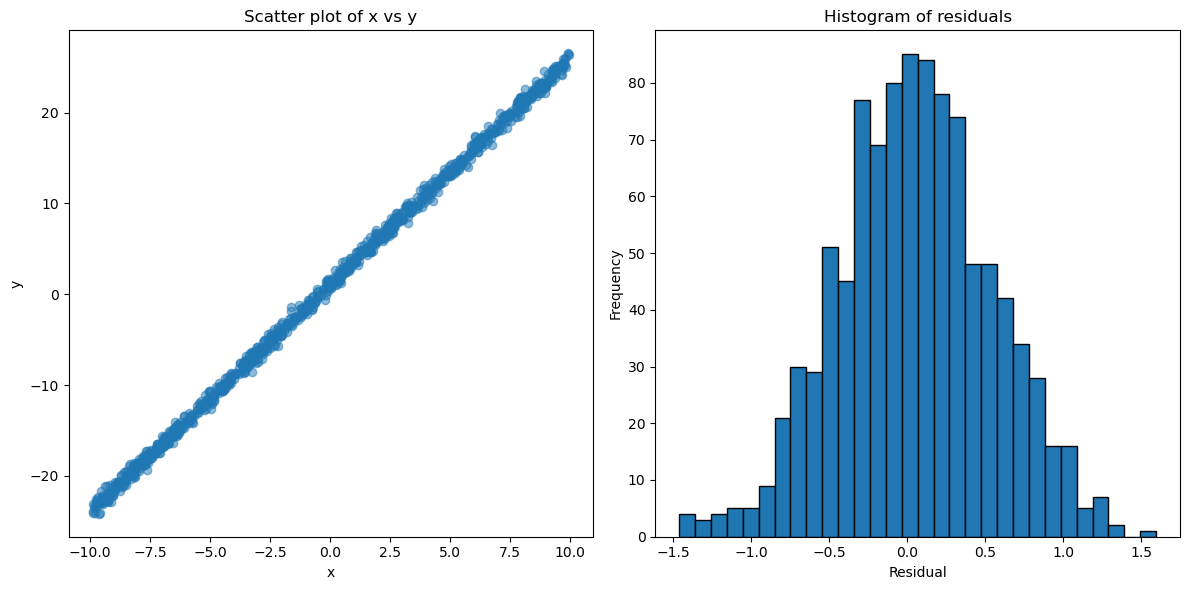

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n_samples = 1000
w = 2.5  # Slope
b = 1.0  # Intercept
noise_std = 0.5  # Standard deviation of the noise

# Generate input data
x = np.random.uniform(-10, 10, n_samples)

# Generate normally distributed noise
noise = np.random.normal(0, noise_std, n_samples)

# Generate output data
y = w * x + b + noise

# Calculate residuals
residuals = y - (w * x + b)

# Plot x vs y
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot of x vs y')
plt.xlabel('x')
plt.ylabel('y')

# Plot histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [2]:
import numpy as np

# Define the model_loop function
def model_loop(x, w, b):
    # Initialize the output array with zeros
    y = np.zeros_like(x)
    # Compute y using a loop
    for i in range(len(x)):
        y[i] = w * x[i] + b
    return y

# Define the model_np function
def model_np(x, w, b):
    # Compute y using vectorized operations
    return w * x + b

# Test the functions
np.random.seed(42)  # For reproducibility
x = np.random.uniform(-10, 10, 1000)  # Random x values
w = 2.5
b = 1.0

# Compute y using both methods
y_loop = model_loop(x, w, b)
y_np = model_np(x, w, b)

# Check if the results are identical
identical = np.allclose(y_loop, y_np)

print(f"Are the results identical? {'Yes' if identical else 'No'}")

# Optionally, print a few values for manual verification
if not identical:
    print("First few values (loop vs. np):")
    print("Loop:", y_loop[:5])
    print("NumPy:", y_np[:5])


Are the results identical? Yes


3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

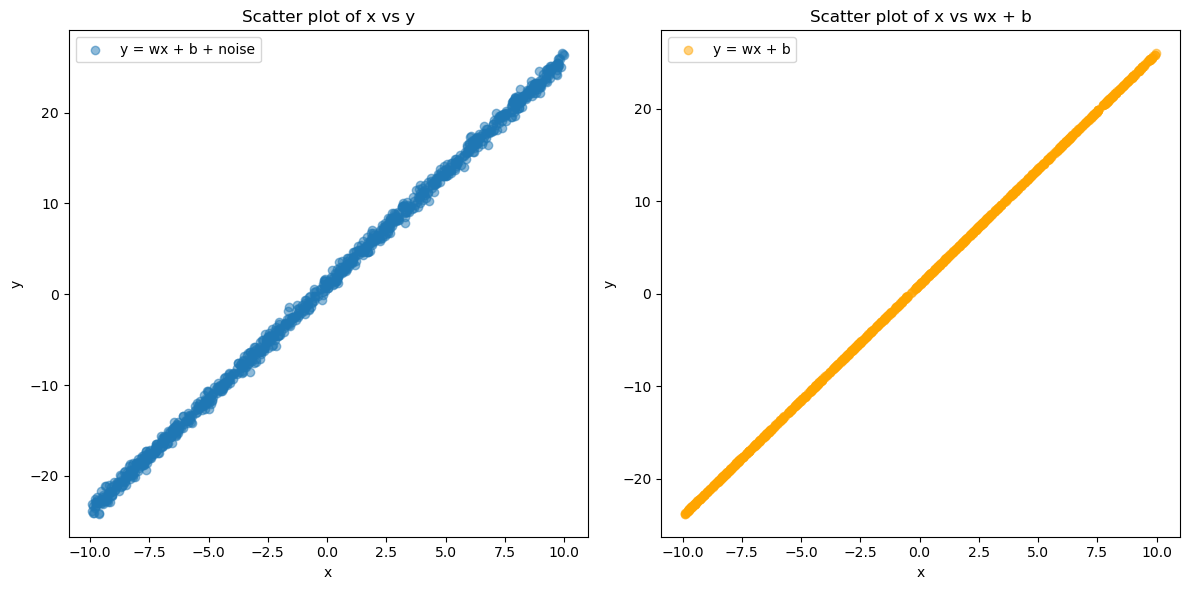

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
w = 2.5
b = 1.0
noise_std = 0.5
n_samples = 1000

# Generate input data
np.random.seed(42)
x = np.random.uniform(-10, 10, n_samples)

# Generate normally distributed noise
noise = np.random.normal(0, noise_std, n_samples)

# Generate output data with noise
y = w * x + b + noise

# Compute the linear relationship without noise
linear_y = w * x + b

# Plot x vs y (with noise)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, y, alpha=0.5, label='y = wx + b + noise')
plt.title('Scatter plot of x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot x vs wx + b (without noise)
plt.subplot(1, 2, 2)
plt.scatter(x, linear_y, alpha=0.5, color='orange', label='y = wx + b')
plt.title('Scatter plot of x vs wx + b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


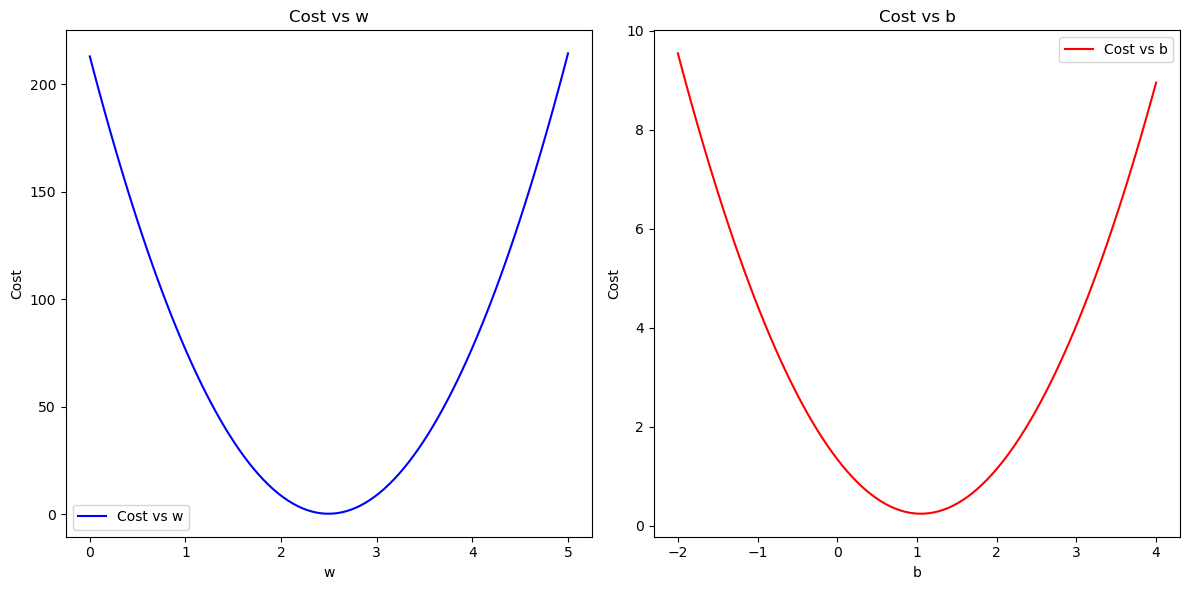

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function
def cost(x, y, w, b):
    predictions = w * x + b
    errors = predictions - y
    mse = np.mean(errors ** 2)
    return mse

# Parameters
w_true = 2.5
b_true = 1.0
noise_std = 0.5
n_samples = 1000

# Generate input data
np.random.seed(42)
x = np.random.uniform(-10, 10, n_samples)

# Generate normally distributed noise
noise = np.random.normal(0, noise_std, n_samples)

# Generate output data with noise
y = w_true * x + b_true + noise

# Define ranges for w and b
w_values = np.linspace(0, 5, 100)
b_values = np.linspace(-2, 4, 100)

# Compute cost for varying w (holding b constant)
b_fixed = b_true
cost_w = np.array([cost(x, y, w, b_fixed) for w in w_values])

# Compute cost for varying b (holding w constant)
w_fixed = w_true
cost_b = np.array([cost(x, y, w_fixed, b) for b in b_values])

# Plot cost vs w
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(w_values, cost_w, label='Cost vs w', color='blue')
plt.title('Cost vs w')
plt.xlabel('w')
plt.ylabel('Cost')
plt.legend()

# Plot cost vs b
plt.subplot(1, 2, 2)
plt.plot(b_values, cost_b, label='Cost vs b', color='red')
plt.title('Cost vs b')
plt.xlabel('b')
plt.ylabel('Cost')
plt.legend()

plt.tight_layout()
plt.show()


5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

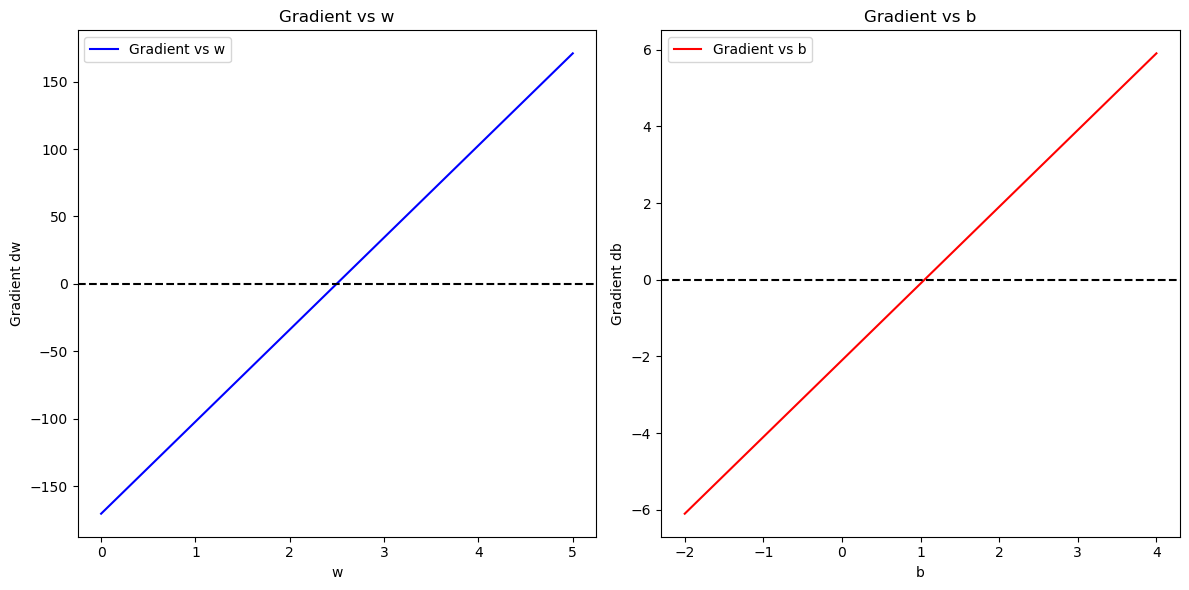

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gradient function
def gradient(x, y, w, b):
    # Number of samples
    m = len(y)
    # Predictions
    predictions = w * x + b
    # Compute gradients
    dj_dw = (2 / m) * np.sum((predictions - y) * x)
    dj_db = (2 / m) * np.sum(predictions - y)
    return dj_dw, dj_db

# Parameters
w_true = 2.5
b_true = 1.0
noise_std = 0.5
n_samples = 1000

# Generate input data
np.random.seed(42)
x = np.random.uniform(-10, 10, n_samples)

# Generate normally distributed noise
noise = np.random.normal(0, noise_std, n_samples)

# Generate output data with noise
y = w_true * x + b_true + noise

# Define ranges for w and b
w_values = np.linspace(0, 5, 100)
b_values = np.linspace(-2, 4, 100)

# Compute gradients for varying w (holding b constant)
b_fixed = b_true
gradients_w = np.array([gradient(x, y, w, b_fixed)[0] for w in w_values])

# Compute gradients for varying b (holding w constant)
w_fixed = w_true
gradients_b = np.array([gradient(x, y, w_fixed, b)[1] for b in b_values])

# Plot gradient vs w
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(w_values, gradients_w, label='Gradient vs w', color='blue')
plt.title('Gradient vs w')
plt.xlabel('w')
plt.ylabel('Gradient dw')
plt.axhline(0, color='black', linestyle='--')
plt.legend()

# Plot gradient vs b
plt.subplot(1, 2, 2)
plt.plot(b_values, gradients_b, label='Gradient vs b', color='red')
plt.title('Gradient vs b')
plt.xlabel('b')
plt.ylabel('Gradient db')
plt.axhline(0, color='black', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()


6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

In [1]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 

Iteration    0: Cost 2.26e+01  dj_dw: -1.700e+02, dj_db: -1.125e+00   w:  1.700e+00, b: 1.12455e-02
Iteration  100: Cost 2.63e-01  dj_dw: -1.660e-03, dj_db: -2.824e-01   w:  2.495e+00, b: 9.10169e-01
Iteration  200: Cost 2.44e-01  dj_dw: -2.207e-04, dj_db: -3.754e-02   w:  2.496e+00, b: 1.03028e+00
Iteration  300: Cost 2.44e-01  dj_dw: -2.934e-05, dj_db: -4.990e-03   w:  2.496e+00, b: 1.04625e+00
Iteration  400: Cost 2.44e-01  dj_dw: -3.900e-06, dj_db: -6.633e-04   w:  2.496e+00, b: 1.04837e+00
Iteration  500: Cost 2.44e-01  dj_dw: -5.184e-07, dj_db: -8.817e-05   w:  2.496e+00, b: 1.04865e+00
Iteration  600: Cost 2.44e-01  dj_dw: -6.891e-08, dj_db: -1.172e-05   w:  2.496e+00, b: 1.04869e+00
Iteration  700: Cost 2.44e-01  dj_dw: -9.160e-09, dj_db: -1.558e-06   w:  2.496e+00, b: 1.04869e+00
Iteration  800: Cost 2.44e-01  dj_dw: -1.218e-09, dj_db: -2.071e-07   w:  2.496e+00, b: 1.04869e+00
Iteration  900: Cost 2.44e-01  dj_dw: -1.619e-10, dj_db: -2.753e-08   w:  2.496e+00, b: 1.04869e+00


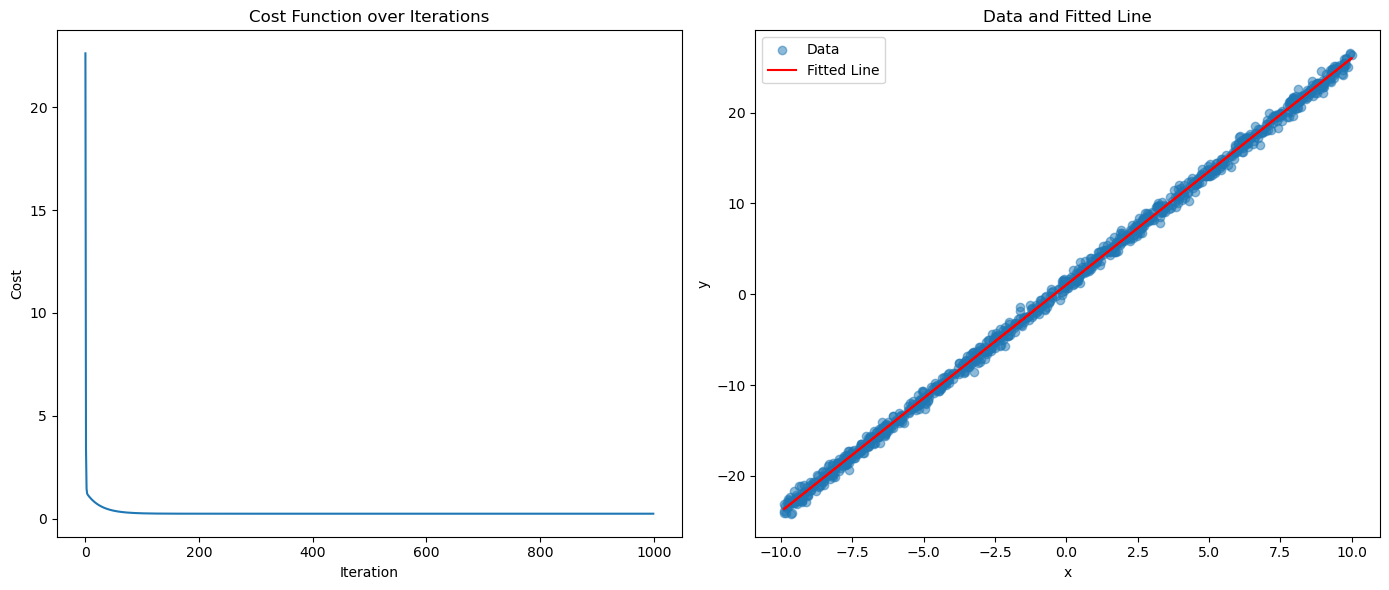

Optimal w: 2.4961303709128453
Optimal b: 1.0486938366508207


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

# Define the gradient function
def gradient(x, y, w, b):
    m = len(y)
    predictions = w * x + b
    dj_dw = (2 / m) * np.sum((predictions - y) * x)
    dj_db = (2 / m) * np.sum(predictions - y)
    return dj_dw, dj_db

# Define the cost function
def cost(x, y, w, b):
    predictions = w * x + b
    errors = predictions - y
    mse = np.mean(errors ** 2)
    return mse

# Define the gradient descent function
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    J_history = []
    p_history = []
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w, b)     
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i < 100000:    
            J_history.append(cost(x, y, w, b))
            p_history.append([w, b])
            
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history

# Parameters
w_true = 2.5
b_true = 1.0
noise_std = 0.5
n_samples = 1000

# Generate input data
np.random.seed(42)
x = np.random.uniform(-10, 10, n_samples)
noise = np.random.normal(0, noise_std, n_samples)
y = w_true * x + b_true + noise

# Initial parameters for gradient descent
w_init = 0.0  # Initial value of w
b_init = 0.0  # Initial value of b
alpha = 0.01  # Learning rate
num_iters = 1000  # Number of iterations

# Run gradient descent
w_opt, b_opt, J_history, p_history = gradient_descent(x, y, w_init, b_init, alpha, num_iters, cost, gradient)

# Plot the cost function over iterations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(J_history)
plt.title('Cost Function over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')

# Plot the data and the fitted line
plt.subplot(1, 2, 2)
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, w_opt * x + b_opt, color='red', label='Fitted Line')
plt.title('Data and Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Optimal w: {w_opt}")
print(f"Optimal b: {b_opt}")


7. Plot the cost and parameters versus iteration of gradient descent.

Iteration    0: Cost 2.26e+01  dj_dw: -1.700e+02, dj_db: -1.125e+00   w:  1.700e+00, b: 1.12455e-02
Iteration  100: Cost 2.63e-01  dj_dw: -1.660e-03, dj_db: -2.824e-01   w:  2.495e+00, b: 9.10169e-01
Iteration  200: Cost 2.44e-01  dj_dw: -2.207e-04, dj_db: -3.754e-02   w:  2.496e+00, b: 1.03028e+00
Iteration  300: Cost 2.44e-01  dj_dw: -2.934e-05, dj_db: -4.990e-03   w:  2.496e+00, b: 1.04625e+00
Iteration  400: Cost 2.44e-01  dj_dw: -3.900e-06, dj_db: -6.633e-04   w:  2.496e+00, b: 1.04837e+00
Iteration  500: Cost 2.44e-01  dj_dw: -5.184e-07, dj_db: -8.817e-05   w:  2.496e+00, b: 1.04865e+00
Iteration  600: Cost 2.44e-01  dj_dw: -6.891e-08, dj_db: -1.172e-05   w:  2.496e+00, b: 1.04869e+00
Iteration  700: Cost 2.44e-01  dj_dw: -9.160e-09, dj_db: -1.558e-06   w:  2.496e+00, b: 1.04869e+00
Iteration  800: Cost 2.44e-01  dj_dw: -1.218e-09, dj_db: -2.071e-07   w:  2.496e+00, b: 1.04869e+00
Iteration  900: Cost 2.44e-01  dj_dw: -1.619e-10, dj_db: -2.753e-08   w:  2.496e+00, b: 1.04869e+00


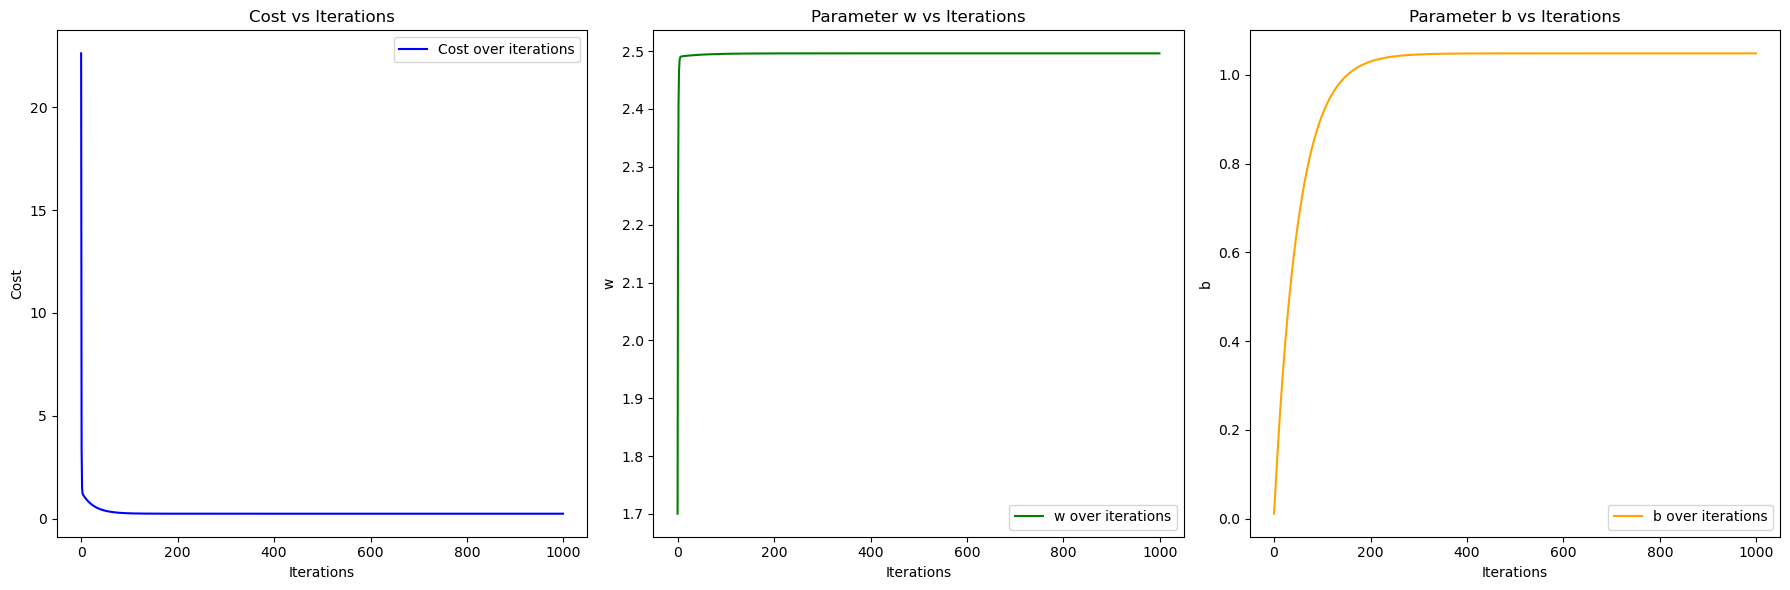

Optimal w: 2.4961303709128453
Optimal b: 1.0486938366508207


In [7]:


# Define the gradient function
def gradient(x, y, w, b):
    m = len(y)
    predictions = w * x + b
    dj_dw = (2 / m) * np.sum((predictions - y) * x)
    dj_db = (2 / m) * np.sum(predictions - y)
    return dj_dw, dj_db

# Define the cost function
def cost(x, y, w, b):
    predictions = w * x + b
    errors = predictions - y
    mse = np.mean(errors ** 2)
    return mse

# Define the gradient descent function
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in)
    b = b_in
    
    J_history = []
    w_history = []
    b_history = []

    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i < 100000:    
            J_history.append(cost(x, y, w, b))
            w_history.append(w)
            b_history.append(b)
            
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, w_history, b_history

# Parameters
w_true = 2.5
b_true = 1.0
noise_std = 0.5
n_samples = 1000

# Generate input data
np.random.seed(42)
x = np.random.uniform(-10, 10, n_samples)
noise = np.random.normal(0, noise_std, n_samples)
y = w_true * x + b_true + noise

# Initial parameters for gradient descent
w_init = 0.0  # Initial value of w
b_init = 0.0  # Initial value of b
alpha = 0.01  # Learning rate
num_iters = 1000  # Number of iterations

# Run gradient descent
w_opt, b_opt, J_history, w_history, b_history = gradient_descent(x, y, w_init, b_init, alpha, num_iters, cost, gradient)

# Plot cost vs iterations
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(J_history, label='Cost over iterations', color='blue')
plt.title('Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

# Plot w vs iterations
plt.subplot(1, 3, 2)
plt.plot(w_history, label='w over iterations', color='green')
plt.title('Parameter w vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('w')
plt.legend()

# Plot b vs iterations
plt.subplot(1, 3, 3)
plt.plot(b_history, label='b over iterations', color='orange')
plt.title('Parameter b vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('b')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Optimal w: {w_opt}")
print(f"Optimal b: {b_opt}")
